In [1]:
# import numpy as np
# from matplotlib import pyplot as plt
# from mdtraj.utils import timing
# #from msmbuilder.example_datasets import load_doublewell
# #from msmbuilder.example_datasets import load_doublewell_Gauss
# #from msmbuilder.example_datasets import load_doublewell_Quart
# #from msmbuilder.cluster import NDGrid
# #from msmbuilder.msm import BayesianMarkovStateModel, MarkovStateModel
# #from msmbuilder.msm import implied_timescales

# import mdtraj as md

# import numpy as np
# import pyemma
# from pyemma.coordinates.api import kmeans, regspace, uniform_time
# from pyemma.msm.analysis import eigenvalues, eigenvectors
# %matplotlib inline


import pyemma
pyemma.__version__

import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import msmbuilder
from msmbuilder.msm.ratematrix import ContinuousTimeMSM
import scipy
from msmtools.analysis.dense.decomposition import eigenvectors, eigenvalues
import operator

Populating the interactive namespace from numpy and matplotlib


/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# load the bin data
base_dir = ''
AA_dir = ''
dtraj_dir = ''
bin_dir = ''
#bin_ctrs = np.load(base_dir+'/'+AA_dir+'/'+bin_dir+'/'+'binctrs_50x50bins.dat.npy')
#print bin_ctrs

In [3]:
# load the traj data
#dtraj_AA = pyemma.msm.io.read_discrete_trajectory(base_dir+'/'+AA_dir+'/'+dtraj_dir+'/'+'dih_1-4_scatter.dat')
dtraj_AA = np.genfromtxt('../FES/dih_1-4dist_scatter.dat')
print dtraj_AA.T[:]

[[-141.077   -141.892   -146.007   ...   78.566     84.306     86.699  ]
 [   0.89714    0.90473    0.86938 ...    0.78329    0.81554    0.82323]]


In [4]:
#print dtraj_AA[:,1]

Nbins = 50

# ax0 = dih
min_ax0 = min(dtraj_AA[:,0])
max_ax0 = max(dtraj_AA[:,0])
print max_ax0
print min_ax0
centers_ax0 = np.linspace(min_ax0, max_ax0, num=Nbins)
print centers_ax0
# ax1 = 1-4
min_ax1 = min(dtraj_AA[:,1])
max_ax1 = max(dtraj_AA[:,1])
print max_ax1
print min_ax1
centers_ax1 = np.linspace(min_ax1, max_ax1, num=Nbins)
print centers_ax1

centers = [centers_ax0, centers_ax1]
print np.array(centers).shape

180.0
-180.0
[-180.         -172.65306122 -165.30612245 -157.95918367 -150.6122449
 -143.26530612 -135.91836735 -128.57142857 -121.2244898  -113.87755102
 -106.53061224  -99.18367347  -91.83673469  -84.48979592  -77.14285714
  -69.79591837  -62.44897959  -55.10204082  -47.75510204  -40.40816327
  -33.06122449  -25.71428571  -18.36734694  -11.02040816   -3.67346939
    3.67346939   11.02040816   18.36734694   25.71428571   33.06122449
   40.40816327   47.75510204   55.10204082   62.44897959   69.79591837
   77.14285714   84.48979592   91.83673469   99.18367347  106.53061224
  113.87755102  121.2244898   128.57142857  135.91836735  143.26530612
  150.6122449   157.95918367  165.30612245  172.65306122  180.        ]
1.12688
0.39437
[0.39437    0.40931918 0.42426837 0.43921755 0.45416673 0.46911592
 0.4840651  0.49901429 0.51396347 0.52891265 0.54386184 0.55881102
 0.5737602  0.58870939 0.60365857 0.61860776 0.63355694 0.64850612
 0.66345531 0.67840449 0.69335367 0.70830286 0.72325204 0.73

In [5]:
bin_ctrs = centers[:]
print len(dtraj_AA[:,0])
print dtraj_AA[:,1]
print len(bin_ctrs[0])
print bin_ctrs[0][1] - bin_ctrs[0][0]
print np.floor(bin_ctrs[0][2] - bin_ctrs[0][1])

500010
[0.89714 0.90473 0.86938 ... 0.78329 0.81554 0.82323]
50
7.3469387755102105
7.0


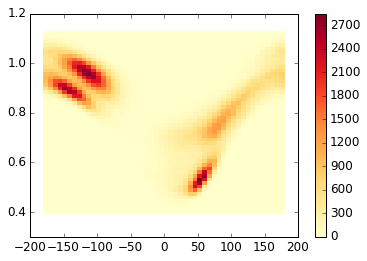

(51,)
(51,)
(50, 50)


In [6]:
# print the histogram of states
dist_AA, xEdges, yEdges = np.histogram2d(dtraj_AA[:,0], dtraj_AA[:,1], len(bin_ctrs[0]) )
#dist_AA,binEdges = np.histogram(dtraj_AA, len(bin_ctrs))
#intl = np.trapz(dist_AA,bin_ctrs)
#dist_AA = np.divide(dist_AA,intl)
#plt.plot(bin_ctrs,dist_AA,'--',linewidth=2.0,color='r')
plt.pcolor(xEdges,yEdges,dist_AA.T,cmap='YlOrRd')
plt.colorbar()
plt.show()

print xEdges.shape
print yEdges.shape
print dist_AA.shape

#plt.axis([-1.05, 1.05, 0.0, 1.2])
#plt.show()

In [7]:
ngridsx = len(bin_ctrs[0])
xmin = min(bin_ctrs[0])
dx = bin_ctrs[0][1] - bin_ctrs[0][0]
ngridsy = len(bin_ctrs[1])
ymin = min(bin_ctrs[1])
dy = bin_ctrs[1][1] - bin_ctrs[1][0]
dtraj_AA_labels = []
xgrid_traj = []
ygrid_traj = []
for i in range(0,len(dtraj_AA[:,0])):
    xgrid_traj.append( int(np.floor( (dtraj_AA[i,0] - xmin) / dx ) ) )
    ygrid_traj.append( int(np.floor( (dtraj_AA[i,1] - ymin) / dy ) ) )
    index = xgrid_traj[i] + ygrid_traj[i]*ngridsx
    dtraj_AA_labels.append(index)

In [8]:
# functions for transforming between bins and labels
def values_to_bins(x,y,xmin,ymin,dx,dy):
    xgrid = int( np.floor( (x - xmin) / dx ) ) 
    ygrid = int( np.floor( (y - ymin) / dy ) ) 
    return xgrid, ygrid

def bins_to_label(xgrid,ygrid,nx):
    label = xgrid + ygrid*nx 
    return label

def label_to_bins(label,nx):
    xgrid = label % nx
    ygrid = (label - xgrid) / nx
    return xgrid, ygrid

def bins_to_values(xgrid, ygrid, values):
    values_x = values[0][xgrid]
    values_y = values[1][ygrid]
    return values_x, values_y

In [9]:
tau = 3
Cmat_AA = pyemma.msm.estimation.count_matrix(dtraj_AA_labels, tau, sliding=False, sparse_return=False, nstates=None)
print pyemma.msm.estimation.is_connected(Cmat_AA, directed=True)
lcc_AA = pyemma.msm.estimation.largest_connected_set(Cmat_AA, directed=True)
Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA, directed=True, lcc=lcc_AA)
print lcc_AA

False
[  26   27   28 ... 2447 2448 2450]


In [10]:
#bin_ctrs_AA_cc = [bin_ctrs[i] for i in lcc_AA]
#bin_ctrs_AA_cc = np.array(bin_ctrs_AA_cc)
#print bin_ctrs
#print bin_ctrs_AA_cc

lcc_trim_AA = lcc_AA[:]
minsamp = np.sum(Cmat_AA_cc) / (100.0*lcc_AA.size)
nrem = 0
for i in range(0,lcc_AA.size):
    shift = i - nrem
    if ( np.sum(Cmat_AA_cc[shift]) < minsamp ): # trim from matrix and bins
        Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=0)
        Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=1)
        lcc_trim_AA = np.delete(lcc_trim_AA, (shift))
        nrem += 1
        
xgrids_trim, ygrids_trim = label_to_bins(lcc_trim_AA,ngridsx)
bin_ctrs_x_trim, bin_ctrs_y_trim = bins_to_values(xgrids_trim, ygrids_trim, bin_ctrs)
#plt.pcolor(lcc_trim_AA,lcc_trim_AA,Cmat_AA_cc,cmap='Blues')
#plt.colorbar()
#plt.show()

#print xgrids_trim
#print ygrids_trim
#print bin_ctrs_x_trim
#print bin_ctrs_y_trim

In [11]:
lcc_AA_tmp = pyemma.msm.estimation.largest_connected_set(Cmat_AA_cc, directed=True)
Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA_cc, directed=True, lcc=lcc_AA_tmp)
lcc_trim_AA = lcc_trim_AA[lcc_AA_tmp]

xgrids_trim, ygrids_trim = label_to_bins(lcc_trim_AA,ngridsx)
bin_ctrs_x_trim, bin_ctrs_y_trim = bins_to_values(xgrids_trim, ygrids_trim, bin_ctrs)

In [12]:
T_AA, pi_AA = pyemma.msm.estimation.transition_matrix(Cmat_AA_cc, reversible=True, mu=None, return_statdist=True)

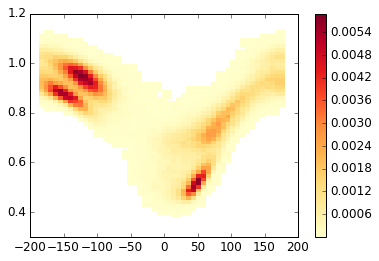

In [13]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=pi_AA,cmap='YlOrRd',marker='s',linewidth=0.0)
plt.colorbar()
plt.show()
#print bin_ctrs_x_trim
#print lcc_trim_AA.shape
#print bin_ctrs_y_trim.shape
#print pi_AA.shape

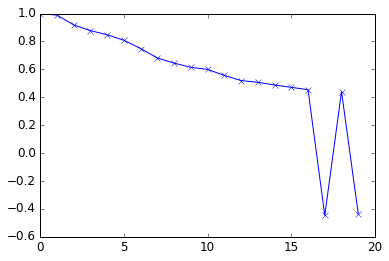

In [14]:
evals = eigenvalues(T_AA,k=20)
plt.plot(np.real(evals),marker='x')
#plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=pi_AA,cmap='YlOrRd',marker='s',linewidth=0.0)
#plt.colorbar()
#plt.show()


In [15]:
ts_est = pyemma.msm.analysis.dense.decomposition.timescales(T_AA)
print ts_est[1:5]
print len(dtraj_AA)

[93.77077615 11.87368853  7.6922178   6.07692411]
500010


In [16]:
ts_f_tau = []
tau = [20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400]
for lag in tau:
    Cmat_AA = pyemma.msm.estimation.count_matrix(dtraj_AA_labels, lag, sliding=True, sparse_return=False, nstates=None)
    lcc_AA = pyemma.msm.estimation.largest_connected_set(Cmat_AA, directed=True)
    Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA, directed=True, lcc=lcc_AA)
    lcc_trim_AA = lcc_AA[:]
    minsamp = np.sum(Cmat_AA_cc) / (100.0*lcc_AA.size)
    nrem = 0
    for i in range(0,lcc_AA.size):
        shift = i - nrem
        if ( np.sum(Cmat_AA_cc[shift]) < minsamp ): # trim from matrix and bins
            Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=0)
            Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=1)
            lcc_trim_AA = np.delete(lcc_trim_AA, (shift))
            nrem += 1
    lcc_AA_tmp = pyemma.msm.estimation.largest_connected_set(Cmat_AA_cc, directed=True)
    Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA_cc, directed=True, lcc=lcc_AA_tmp)
    lcc_trim_AA = lcc_trim_AA[lcc_AA_tmp]
    T_AA, pi_AA = pyemma.msm.estimation.transition_matrix(Cmat_AA_cc, reversible=True, mu=None, return_statdist=True)
    ts_est = pyemma.msm.analysis.dense.decomposition.timescales(T_AA)
    ts_f_tau.append(ts_est[1:5])
ts_f_tau = np.array(ts_f_tau)

In [17]:
print ts_f_tau[0,:]
print ts_f_tau[:,0]
print ts_f_tau[:,:]

[26.35582147  4.66047362  3.86206814  1.98063129]
[26.35582147 15.52358964 11.17591727  8.77243131  7.29579705  6.27509751
  5.5057305   4.90105224  4.41142226  4.00641824  3.67469967  3.39961012
  3.16525484  2.95954291  2.77767981  2.61519914  2.46707602  2.33470566
  2.21619094  2.11213958]
[[26.35582147  4.66047362  3.86206814  1.98063129]
 [15.52358964  3.33379717  3.04114377  1.28641339]
 [11.17591727  2.68650319  2.54049976  1.03968497]
 [ 8.77243131  2.34223028  2.18140715  0.93616567]
 [ 7.29579705  2.09610197  1.91083427  0.85931709]
 [ 6.27509751  1.91362386  1.71895199  0.79728063]
 [ 5.5057305   1.74491993  1.56416615  0.76075796]
 [ 4.90105224  1.61019021  1.43584227  0.75287108]
 [ 4.41142226  1.4965816   1.32452657  0.74592679]
 [ 4.00641824  1.40070734  1.23096365  0.73750595]
 [ 3.67469967  1.31290438  1.15550863  0.71599784]
 [ 3.39961012  1.24332745  1.09486176  0.71338446]
 [ 3.16525484  1.17930905  1.03790744  0.69076617]
 [ 2.95954291  1.12562327  0.98597876  0.6

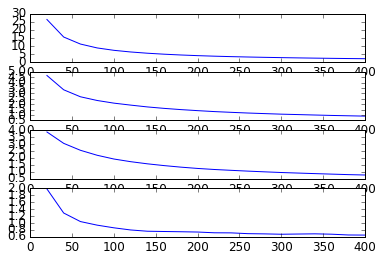

In [18]:
fig = plt.figure(1)
plt.subplot(4,1,1)
plt.plot(tau,ts_f_tau[:,0])
plt.subplot(4,1,2)
plt.plot(tau,ts_f_tau[:,1])
plt.subplot(4,1,3)
plt.plot(tau,ts_f_tau[:,2])
plt.subplot(4,1,4)
plt.plot(tau,ts_f_tau[:,3])

In [19]:
tau = [20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400]
its_full = msm.timescales_msm(dtraj_AA_labels, lags=tau, nits=6)


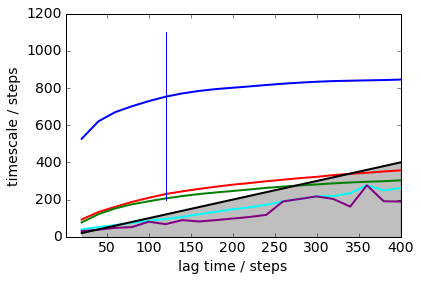

In [20]:
matplotlib.rcParams.update({'font.size': 14})
mplt.plot_implied_timescales(its_full, ylog=False, units='steps', linewidth=2)
plt.plot(120.*np.ones(10),np.arange(10)*100+200)
#xlim(0, 10); ylim(0, 100);

In [21]:
tau = 120
Cmat_AA = pyemma.msm.estimation.count_matrix(dtraj_AA_labels, tau, sliding=True, sparse_return=False, nstates=None)
print pyemma.msm.estimation.is_connected(Cmat_AA, directed=True)
lcc_AA = pyemma.msm.estimation.largest_connected_set(Cmat_AA, directed=True)
Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA, directed=True, lcc=lcc_AA)

False


In [22]:
#bin_ctrs_AA_cc = [bin_ctrs[i] for i in lcc_AA]
#bin_ctrs_AA_cc = np.array(bin_ctrs_AA_cc)
#print bin_ctrs
#print bin_ctrs_AA_cc

lcc_trim_AA = lcc_AA[:]
minsamp = np.sum(Cmat_AA_cc) / (100.0*lcc_AA.size)
nrem = 0
for i in range(0,lcc_AA.size):
    shift = i - nrem
    if ( np.sum(Cmat_AA_cc[shift]) < minsamp ): # trim from matrix and bins
        Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=0)
        Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=1)
        lcc_trim_AA = np.delete(lcc_trim_AA, (shift))
        nrem += 1
        
lcc_AA_tmp = pyemma.msm.estimation.largest_connected_set(Cmat_AA_cc, directed=True)
Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA_cc, directed=True, lcc=lcc_AA_tmp)
lcc_trim_AA = lcc_trim_AA[lcc_AA_tmp]

xgrids_trim, ygrids_trim = label_to_bins(lcc_trim_AA,ngridsx)
bin_ctrs_x_trim, bin_ctrs_y_trim = bins_to_values(xgrids_trim, ygrids_trim, bin_ctrs)

In [23]:
T_AA, pi_AA = pyemma.msm.estimation.transition_matrix(Cmat_AA_cc, reversible=True, mu=None, return_statdist=True)

In [24]:
# save the model
np.save('T',T_AA)
np.save('mu',pi_AA)
np.save('tau',tau)
np.save('grids_trim',np.array([xgrids_trim,ygrids_trim]))
np.save('bin_ctrs_trim',np.array([bin_ctrs_x_trim,bin_ctrs_y_trim]))
np.save('lcc_trim',lcc_trim_AA)

In [25]:
xgrids_trim

array([26, 27, 24, ..., 48,  1, 48])

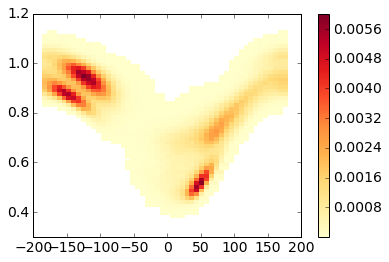

In [26]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=pi_AA,cmap='YlOrRd',marker='s',linewidth=0.0)
plt.colorbar()
plt.show()

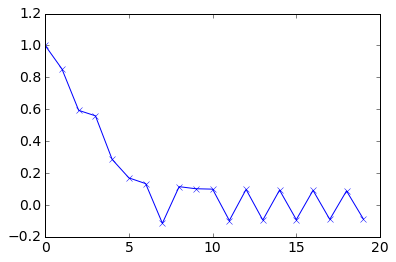

In [27]:
evals = eigenvalues(T_AA,k=20)
plt.plot(np.real(evals),marker='x')

In [28]:
evecs = eigenvectors(T_AA,k=20)

In [29]:
#print evecs[:,1]

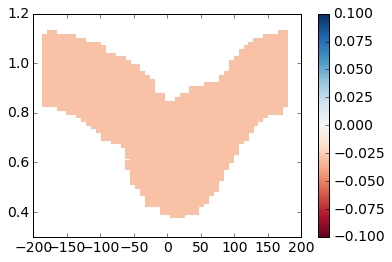

In [30]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=evecs[:,0],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

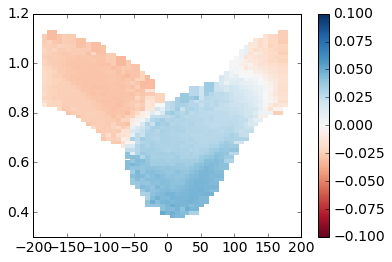

In [31]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=evecs[:,1],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

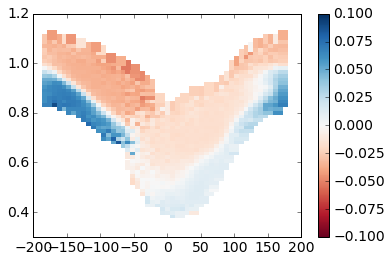

In [32]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=evecs[:,2],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

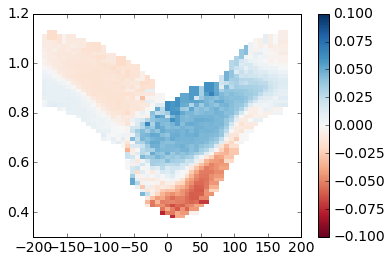

In [33]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=evecs[:,3],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

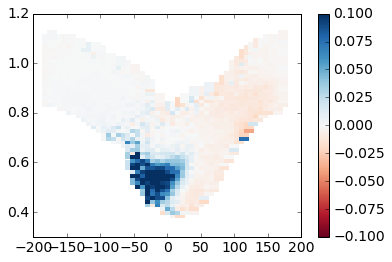

In [34]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=evecs[:,4],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

In [35]:
from pyemma.msm import PCCA

In [36]:
pcca=PCCA(T_AA, 4)

In [37]:
membership_crisp=np.where(pcca.memberships>0.5)

In [38]:
#print membership_crisp[0]
membership = pcca.memberships

In [39]:
#print list(set(t) - set(s))  bin_ctrs_x_trim
#print bin_ctrs_y_trim
centers = [np.sort(list(set(bin_ctrs_x_trim))),np.sort(list(set(bin_ctrs_y_trim)))]
print centers[0]
print centers[1]

[-180.         -172.65306122 -165.30612245 -157.95918367 -150.6122449
 -143.26530612 -135.91836735 -128.57142857 -121.2244898  -113.87755102
 -106.53061224  -99.18367347  -91.83673469  -84.48979592  -77.14285714
  -69.79591837  -62.44897959  -55.10204082  -47.75510204  -40.40816327
  -33.06122449  -25.71428571  -18.36734694  -11.02040816   -3.67346939
    3.67346939   11.02040816   18.36734694   25.71428571   33.06122449
   40.40816327   47.75510204   55.10204082   62.44897959   69.79591837
   77.14285714   84.48979592   91.83673469   99.18367347  106.53061224
  113.87755102  121.2244898   128.57142857  135.91836735  143.26530612
  150.6122449   157.95918367  165.30612245  172.65306122]
[0.39437    0.40931918 0.42426837 0.43921755 0.45416673 0.46911592
 0.4840651  0.49901429 0.51396347 0.52891265 0.54386184 0.55881102
 0.5737602  0.58870939 0.60365857 0.61860776 0.63355694 0.64850612
 0.66345531 0.67840449 0.69335367 0.70830286 0.72325204 0.73820122
 0.75315041 0.76809959 0.78304878 0.

In [40]:
print centers[0].size
print centers[1].size
print T_AA.shape
print bin_ctrs_x_trim.size
print membership[:,0]
#pi_AA_M = np.reshape(pi_AA, (centers[0].size,centers[1].size))

49
49
(1182, 1182)
1182
[0.85696328 0.65786979 0.88928479 ... 0.01013019 0.00594951 0.00289739]


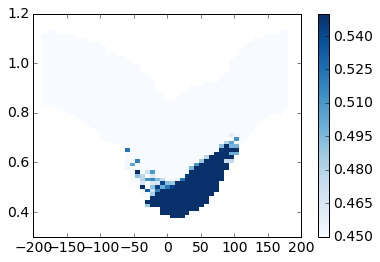

In [41]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=membership[:,0],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

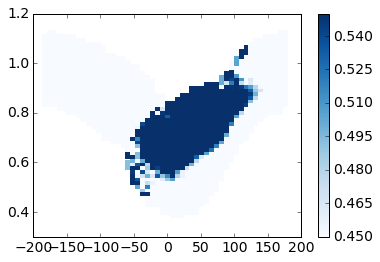

In [42]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=membership[:,1],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

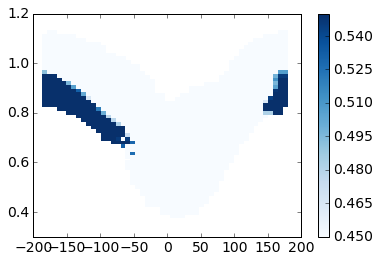

In [43]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=membership[:,2],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

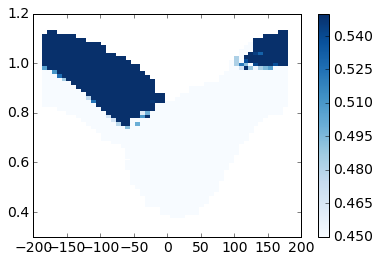

In [44]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=membership[:,3],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

In [45]:
# define the metastable states by label
E2 = np.where(membership[:,0]>0.5)
E1 = np.where(membership[:,1]>0.5)
H = np.where(membership[:,2]>0.5)
I = np.where(membership[:,3]>0.5)

In [46]:
# make sure there is no overlap
check = [val for val in E2[0] if val in I[0]]
print check 
check = [val for val in E2[0] if val in E1[0]]
print check 
check = [val for val in E2[0] if val in H[0]]
print check 

[]
[]
[]


In [47]:
print I[0]
lcc_trim_AA[I[0]]
lcc_trim_AA
# save the transformation to global grids??
np.save('lcc_trim_AA',lcc_trim_AA)

[ 465  466  468  499  500  501  535  536  537  538  539  540  541  542
  574  575  576  577  578  579  580  617  618  619  620  621  622  623
  624  625  626  627  664  665  666  667  668  669  670  671  672  673
  674  675  709  710  711  712  713  714  715  716  717  718  719  720
  721  722  753  754  755  756  757  758  759  760  761  762  763  764
  793  794  795  796  797  798  799  800  801  802  803  804  805  832
  833  834  835  836  837  838  839  840  841  842  843  844  845  868
  869  870  871  872  873  874  875  876  877  878  879  880  881  882
  902  903  904  905  906  907  908  909  910  911  912  913  914  915
  916  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  965  966  967  968  969  970  971  972  973  974  975  976
  977  978  979  980  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1021 1022 1023 1024 1025 1026 1027
 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1041 1046 1049 1050
 1051 

In [48]:
# get the grids for each set
xgrids_I, ygrids_I = label_to_bins(lcc_trim_AA[I[0]],ngridsx)
bin_ctrs_x_I, bin_ctrs_y_I = bins_to_values(xgrids_I, ygrids_I, bin_ctrs)

xgrids_E2, ygrids_E2 = label_to_bins(lcc_trim_AA[E2[0]],ngridsx)
bin_ctrs_x_E2, bin_ctrs_y_E2 = bins_to_values(xgrids_E2, ygrids_E2, bin_ctrs)

xgrids_H, ygrids_H = label_to_bins(lcc_trim_AA[H[0]],ngridsx)
bin_ctrs_x_H, bin_ctrs_y_H = bins_to_values(xgrids_H, ygrids_H, bin_ctrs)

xgrids_E1, ygrids_E1 = label_to_bins(lcc_trim_AA[E1[0]],ngridsx)
bin_ctrs_x_E1, bin_ctrs_y_E1 = bins_to_values(xgrids_E1, ygrids_E1, bin_ctrs)

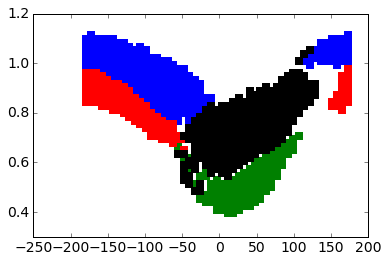

In [49]:
plt.scatter(bin_ctrs_x_I, bin_ctrs_y_I,color='b',s=50,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_x_E2, bin_ctrs_y_E2,color='g',s=50,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_x_H, bin_ctrs_y_H,color='r',s=50,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_x_E1, bin_ctrs_y_E1,color='k',s=50,marker='s',linewidth=0.0)
plt.show()

In [49]:
#from pyemma.msm.analysis import mfpt
from msmtools.analysis import mfpt

In [50]:
m_t_H_I = mfpt(T_AA,I[0],origin=H[0])
m_t_H_E1 = mfpt(T_AA,E1[0],origin=H[0])
m_t_H_E2 = mfpt(T_AA,E2[0],origin=H[0])

m_t_I_E1 = mfpt(T_AA,E1[0],origin=I[0])
m_t_I_E2 = mfpt(T_AA,E2[0],origin=I[0])
m_t_I_H = mfpt(T_AA,H[0],origin=I[0])

m_t_E1_E2 = mfpt(T_AA,E2[0],origin=E1[0])
m_t_E1_I = mfpt(T_AA,I[0],origin=E1[0])
m_t_E1_H = mfpt(T_AA,H[0],origin=E1[0])

m_t_E2_E1 = mfpt(T_AA,E1[0],origin=E2[0])
m_t_E2_I = mfpt(T_AA,I[0],origin=E2[0])
m_t_E2_H = mfpt(T_AA,H[0],origin=E2[0])

In [51]:
print m_t_H_I 
print m_t_H_E1 
print m_t_H_E2
print '\n'
print m_t_I_E1 
print m_t_I_E2 
print m_t_I_H 
print '\n'
print m_t_E1_E2 
print m_t_E1_I 
print m_t_E1_H 
print '\n'
print m_t_E2_E1 
print m_t_E2_I 
print m_t_E2_H 

7.475770759298689
16.421180866285223
29.982264419075374


16.716425835728575
31.10607783849361
11.023763415249906


18.47825813368068
14.111444649888027
17.33972442046733


6.979104135507727
16.663946179287056
19.069304898798244


In [55]:
# save the memberships
np.savez('PCCA_4state',E2=E2[0],E1=E1[0],H=H[0],I=I[0])

In [51]:
pcca=PCCA(T_AA, 2)

In [52]:
#print membership_crisp[0]
membership = pcca.memberships

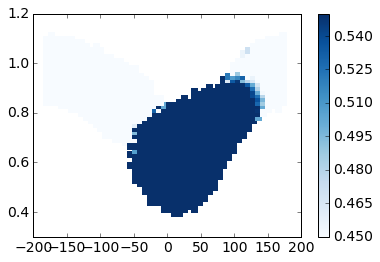

In [54]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=50,c=membership[:,0],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

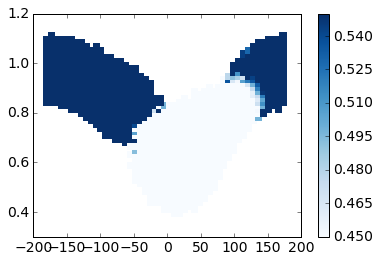

In [55]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=50,c=membership[:,1],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

In [56]:
# define the metastable states by label
H = np.where(membership[:,0]>0.5)
E = np.where(membership[:,1]>0.5)

In [57]:
# make sure there is no overlap
check = [val for val in H[0] if val in E[0]]
print check 

[]


In [58]:
# get the grids for each set
xgrids_E, ygrids_E = label_to_bins(lcc_trim_AA[E[0]],ngridsx)
bin_ctrs_x_E, bin_ctrs_y_E = bins_to_values(xgrids_E, ygrids_E, bin_ctrs)

xgrids_H, ygrids_H = label_to_bins(lcc_trim_AA[H[0]],ngridsx)
bin_ctrs_x_H, bin_ctrs_y_H = bins_to_values(xgrids_H, ygrids_H, bin_ctrs)

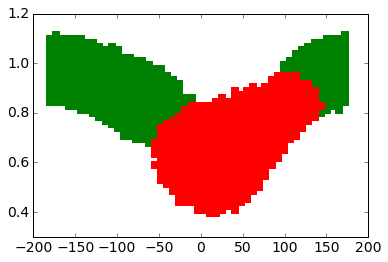

In [59]:
plt.scatter(bin_ctrs_x_E, bin_ctrs_y_E,color='g',s=50,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_x_H, bin_ctrs_y_H,color='r',s=50,marker='s',linewidth=0.0)
plt.show()

In [60]:
# save the memberships
np.savez('PCCA_2state',E=E[0],H=H[0])